# Embeddings, Conv1D en Recurrente netwerken

In [16]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Flatten, Dense

## Stap 1: Verover de data

We gebruiken de IMDB dataset met filmrecensies. Deze hebben we tijdens de bootcamp ook al eens bekeken. ter herinnering: de labels zijn binair en geven aan of een film wel of geen aanrader is volgens de reviews.

We maken het ons zelf iets moeilijker door van elke review alleen de eerste 20 woorden te gebruiken.

In [17]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000
maxlen = 20 # gebruik alleen de eerste 20 woorden van iedere review (voor efficiency)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

# gebruik alleen de eerste 20 woorden
# vul sequences korter dan 20 woorden aan met nullen
x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen = maxlen)

x_val_set = x_train[:10000]
x_train_set = x_train[10000:]

y_val_set = y_train[:10000]
y_train_set = y_train[10000:]

In [18]:
print(x_train_set.shape, y_train_set.shape)

(15000, 20) (15000,)


## Stap 2: Embedding

We trainen een embedding layer in combinatie met een Dense netwerk. In onderstaande code zijn de lagen voor de embedding al ingevuld. Maak het netwerk af met een of meer dense lagen, compileer en train dit.

In [19]:
from keras.layers import Embedding

model = Sequential()

model.add(Embedding(10000, 16, input_length = maxlen))
model.add(Flatten())

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train_set, y_train_set, epochs = 10, batch_size = 32, validation_data = (x_val_set, y_val_set))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6616 - acc: 0.6451 - val_loss: 0.5993 - val_acc: 0.7144
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5293 - acc: 0.7534 - val_loss: 0.5109 - val_acc: 0.7512
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4528 - acc: 0.7957 - val_loss: 0.4886 - val_acc: 0.7612
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4102 - acc: 0.8207 - val_loss: 0.4867 - val_acc: 0.7661
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3765 - acc: 0.8377 - val_loss: 0.4874 - val_acc: 0.7674
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3457 - acc: 0.8547 - val_loss: 0.4935 - val_acc: 0.7646
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3164 - acc: 0.8696 - val_loss: 0.4990 - val_acc: 0.7611
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.

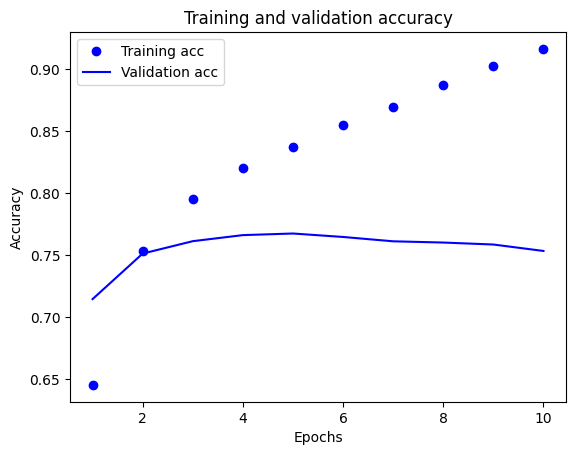

In [20]:
# plot de resultaten
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Stap 3: 1D Convolutie

Experimenteer met een netwerk met een Embedding en een of meer `Conv1D` lagen.

In [21]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()

model.add(Embedding(10000, 16, input_length=maxlen))

model.add(Conv1D(32, 5, activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train_set, y_train_set, epochs=10, batch_size=32, validation_data=(x_val_set, y_val_set))

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.6503 - acc: 0.6338 - val_loss: 0.5699 - val_acc: 0.7015
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5123 - acc: 0.7498 - val_loss: 0.5090 - val_acc: 0.7463
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4567 - acc: 0.7867 - val_loss: 0.5040 - val_acc: 0.7506
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4245 - acc: 0.8067 - val_loss: 0.5096 - val_acc: 0.7508
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3986 - acc: 0.8255 - val_loss: 0.5111 - val_acc: 0.7564
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3744 - acc: 0.8407 - val_loss: 0.5196 - val_acc: 0.7533
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3526 - acc: 0.8545 - val_loss: 0.5258 - val_acc: 0.7526
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 

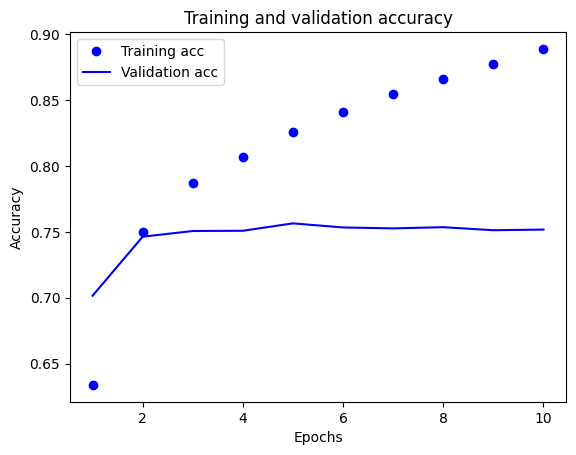

In [22]:
# plot de resultaten
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<b>

Er is eigenlijk nauwelijks verschil tussen de twee modellen.

## Stap 4: Eenvoudig RNN

Experimenteer met een netwerk met een Embedding en een of meer `SimpleRNN` lagen.

In [23]:
# Experimenteer met een netwerk met een Embedding en een of meer `SimpleRNN` lagen

from keras.layers import SimpleRNN

model = Sequential()

model.add(Embedding(10000, 16, input_length = maxlen))

model.add(SimpleRNN(32))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train_set, y_train_set, epochs = 10, batch_size = 32, validation_data = (x_val_set, y_val_set))

Epoch 1/10
469/469 [==============================] - 7s 11ms/step - loss: 0.6181 - acc: 0.6457 - val_loss: 0.5224 - val_acc: 0.7381
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.4569 - acc: 0.7830 - val_loss: 0.4953 - val_acc: 0.7554
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3862 - acc: 0.8302 - val_loss: 0.5127 - val_acc: 0.7492
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3210 - acc: 0.8628 - val_loss: 0.5408 - val_acc: 0.7499
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2489 - acc: 0.8985 - val_loss: 0.6317 - val_acc: 0.7320
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1822 - acc: 0.9299 - val_loss: 0.6994 - val_acc: 0.7269
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1282 - acc: 0.9539 - val_loss: 0.8574 - val_acc: 0.6894
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - 

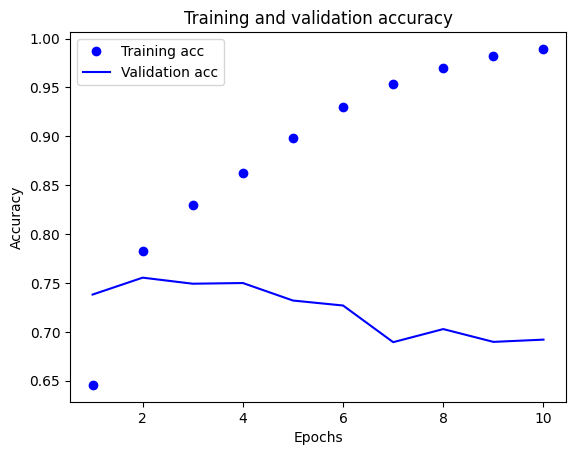

In [24]:
# plot de resultaten
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<b>

De plot toont een overfitting. Het netwerk heeft stijgende training acc en dalende validation acc. Het feit dat de train acc stijgt, betekent dat het model steeds beter wordt in het voorspellen van de trainingsvoorbeelden naarmate het meer getraind wordt.
Aan de andere kant, wanneer de val acc daalt, betekent dit dat het model niet goed presteert op nieuwe, ongeziene data

## Dlo oplossing voor stap 4

In [25]:
model = Sequential()

model.add(Embedding(10000, 16, input_length = maxlen))

model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train_set, y_train_set, epochs = 10, batch_size = 32, validation_data = (x_val_set, y_val_set))

Epoch 1/10
469/469 [==============================] - 10s 15ms/step - loss: 0.6308 - acc: 0.6134 - val_loss: 0.5202 - val_acc: 0.7409
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.4613 - acc: 0.7813 - val_loss: 0.5076 - val_acc: 0.7474
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.3707 - acc: 0.8353 - val_loss: 0.5358 - val_acc: 0.7349
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.2852 - acc: 0.8835 - val_loss: 0.6083 - val_acc: 0.7348
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1978 - acc: 0.9237 - val_loss: 0.7395 - val_acc: 0.7026
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1307 - acc: 0.9527 - val_loss: 0.8578 - val_acc: 0.6997
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0831 - acc: 0.9719 - val_loss: 1.0012 - val_acc: 0.7061
Epoch 8/10
469/469 [==============================] - 9s 19ms/step -

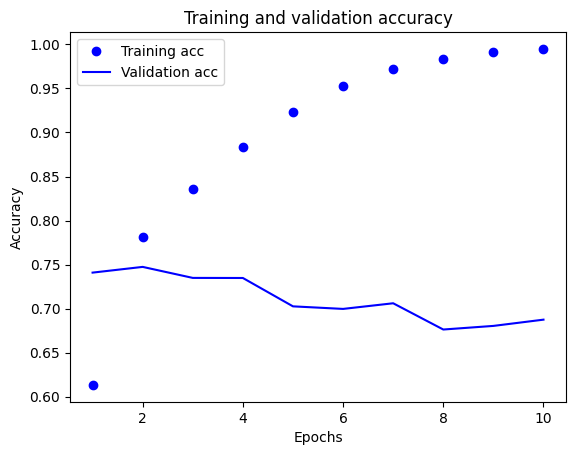

In [26]:
# plot de resultaten
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<b>

Dit geeft ongeveer dezelfde resultaten als het vorig model. Het is een beetje beter, maar niet veel. Ik heb het getest om te kijken of het parameter `return_sequences = True` een verschil maakt. 

Wat ik bergrepen heb is dat `return_sequences = True` betekent dat de uitvoersequenties van de eerste SimpleRNN-laag voor elke tijdstap worden doorgegeven aan de volgende SimpleRNN-laag. Hierdoor kan het model leren van de tijdsafhankelijke patronen in de inputsequenties. Misschien als ik het model meer train, dat het dan beter wordt.

## Stap 5: LSTM (LONG SHORT-TERM MEMORY)

Experimenteer met een netwerk met een Embedding en een of meer `LSTM` lagen.

In [28]:
# Experimenteer met een netwerk met een Embedding en een of meer `LSTM` lagen

from keras.layers import LSTM

model = Sequential()

model.add(Embedding(10000, 16, input_length = maxlen))

model.add(LSTM(32, return_sequences = True))
model.add(LSTM(32))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train_set, y_train_set, epochs = 10, batch_size = 32, validation_data = (x_val_set, y_val_set))

Epoch 1/10
469/469 [==============================] - 11s 15ms/step - loss: 0.6182 - acc: 0.6364 - val_loss: 0.5294 - val_acc: 0.7327
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.4713 - acc: 0.7771 - val_loss: 0.5093 - val_acc: 0.7555
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.4191 - acc: 0.8093 - val_loss: 0.4930 - val_acc: 0.7585
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3904 - acc: 0.8262 - val_loss: 0.4892 - val_acc: 0.7624
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3662 - acc: 0.8399 - val_loss: 0.4926 - val_acc: 0.7610
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3455 - acc: 0.8523 - val_loss: 0.5184 - val_acc: 0.7590
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3242 - acc: 0.8637 - val_loss: 0.5167 - val_acc: 0.7556
Epoch 8/10
469/469 [==============================] - 6s 12ms/step -

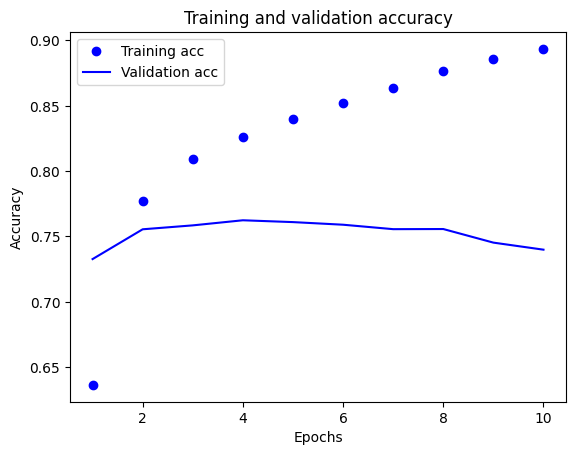

In [29]:
# plot de resultaten
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<b>

Dit model presteert beter dan de RNN-modellen. De validatie-accuraatheid stijgt aanvankelijk en blijft daarna ongeveer constant.

## Stap 6: Combineer `Conv1D` en `LSTM`

In [30]:
# combineer een Conv1D laag met een LSTM laag
model = Sequential()

model.add(Embedding(10000, 16, input_length = maxlen))

model.add(Conv1D(32, 5, activation = 'relu'))

model.add(LSTM(32, return_sequences = True))

model.add(LSTM(32))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train_set, y_train_set, epochs = 10, batch_size = 32, validation_data = (x_val_set, y_val_set))

Epoch 1/10
469/469 [==============================] - 9s 13ms/step - loss: 0.6289 - acc: 0.6226 - val_loss: 0.5456 - val_acc: 0.7188
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.4805 - acc: 0.7704 - val_loss: 0.4970 - val_acc: 0.7502
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.4202 - acc: 0.8119 - val_loss: 0.4902 - val_acc: 0.7598
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3822 - acc: 0.8277 - val_loss: 0.5052 - val_acc: 0.7632
Epoch 5/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3477 - acc: 0.8508 - val_loss: 0.5259 - val_acc: 0.7537
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3126 - acc: 0.8677 - val_loss: 0.5162 - val_acc: 0.7552
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.2769 - acc: 0.8878 - val_loss: 0.5472 - val_acc: 0.7466
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - 

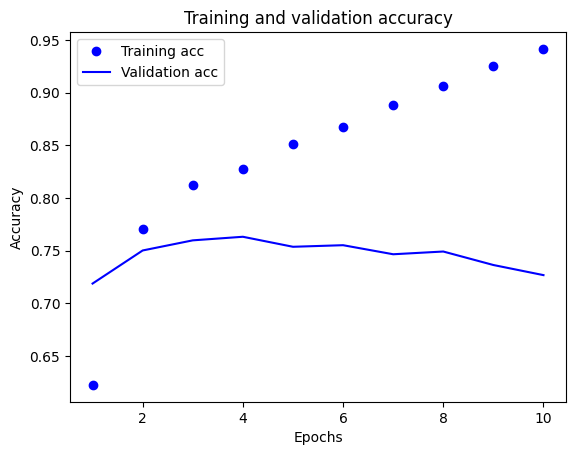

In [31]:
# plot de resultaten
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<b>

Dit model lijkt vrijwel identiek aan het vorige model. 